# **IndiaEnergyPredict**
The project involves predicting energy trends specifically within India.


In [1]:
# Loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset into df (data frame)

In [6]:
df = pd.read_csv("/content/IEPD.csv")
df.head()

,Year,Fuel ethanol (Mb/d),Biomass-based diesel (Mb/d),Coal (Mst),Coal (Mt),Generation (billion kWh)
0,1980,0.0,0.0,121502.1198,133933.0016,119.260
1,1981,0.0,0.0,132829.4573,146419.2391,131.120
2,1982,0.0,0.0,141607.1518,156094.9795,139.410
3,1983,0.0,0.0,149479.8499,164773.1333,144.987
4,1984,0.0,0.0,161234.8837,177730.8247,161.739


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 43 non-null     int64  
 1           Fuel ethanol (Mb/d)          43 non-null     float64
 2           Biomass-based diesel (Mb/d)  43 non-null     float64
 3   Coal (Mst)                           43 non-null     float64
 4   Coal (Mt)                            43 non-null     float64
 5       Generation (billion kWh)         43 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


drop the unnecessary column

In [8]:
df = df.drop(columns=['Coal (Mst)'])

In [9]:
print(df.columns)

Index(['Year', '        Fuel ethanol (Mb/d)',
       '        Biomass-based diesel (Mb/d)', 'Coal (Mt)',
       '    Generation (billion kWh)'],
      dtype='object')


Fix the column names and then remane the column

In [10]:
df = df.rename(columns={
    '        Fuel ethanol (Mb/d)': 'Ethanol (Mb/d)',
    '        Biomass-based diesel (Mb/d)': 'Bio-diesel (Mb/d)',
    '    Generation (billion kWh)': 'Electricity (billion kWh)'
})

In [11]:
print(df.columns)

Index(['Year', 'Ethanol (Mb/d)', 'Bio-diesel (Mb/d)', 'Coal (Mt)',
       'Electricity (billion kWh)'],
      dtype='object')


In [12]:
df.head()

,Year,Ethanol (Mb/d),Bio-diesel (Mb/d),Coal (Mt),Electricity (billion kWh)
0,1980,0.0,0.0,133933.0016,119.260
1,1981,0.0,0.0,146419.2391,131.120
2,1982,0.0,0.0,156094.9795,139.410
3,1983,0.0,0.0,164773.1333,144.987
4,1984,0.0,0.0,177730.8247,161.739


Visualizations of data

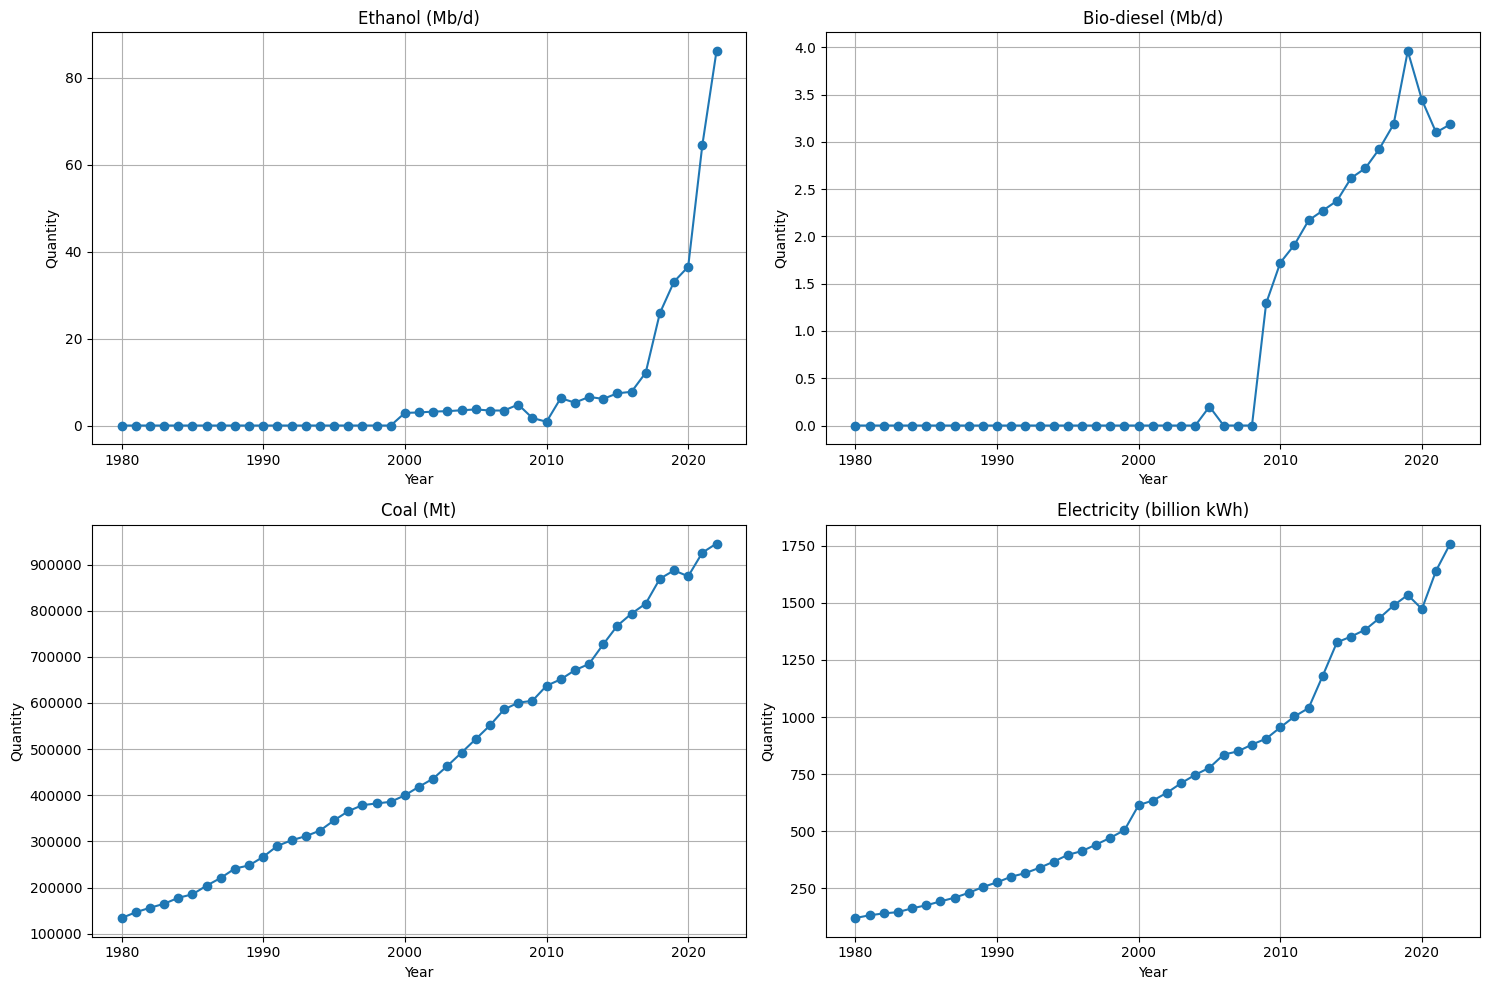

In [13]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Ethanol (Mb/d)
axs[0, 0].plot(df['Year'], df['Ethanol (Mb/d)'], marker='o')
axs[0, 0].set_title('Ethanol (Mb/d)')

# Plot Bio-diesel (Mb/d)
axs[0, 1].plot(df['Year'], df['Bio-diesel (Mb/d)'], marker='o')
axs[0, 1].set_title('Bio-diesel (Mb/d)')

# Plot Coal (Mt)
axs[1, 0].plot(df['Year'], df['Coal (Mt)'], marker='o')
axs[1, 0].set_title('Coal (Mt)')

# Plot Electricity (billion kWh)
axs[1, 1].plot(df['Year'], df['Electricity (billion kWh)'], marker='o')
axs[1, 1].set_title('Electricity (billion kWh)')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Quantity')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Making prediction and Models

In [36]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

1/1 [==============================] - 0s 80ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


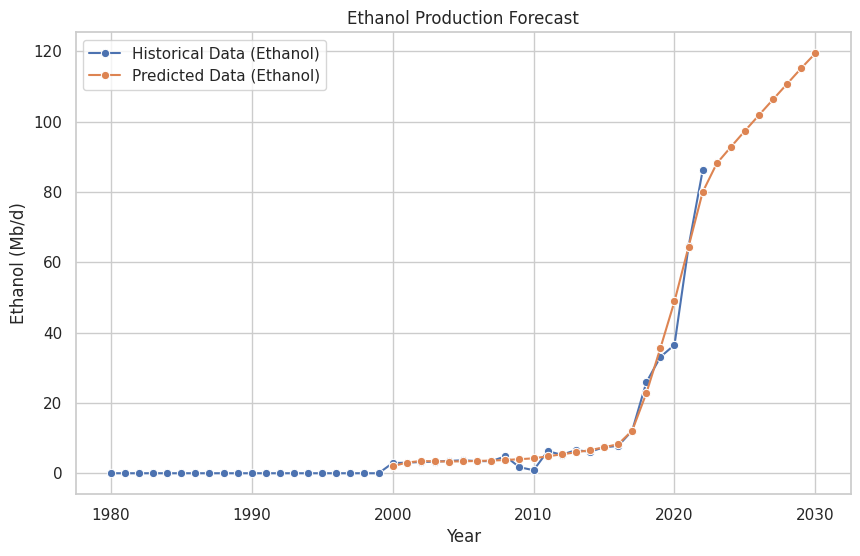

    Year  Ethanol (Mb/d)
0   2000        1.994679
1   2001        3.041745
2   2002        3.478315
3   2003        3.378818
4   2004        3.333907
5   2005        3.397323
6   2006        3.495623
7   2007        3.607858
8   2008        3.768416
9   2009        3.997958
10  2010        4.241520
11  2011        4.811849
12  2012        5.382180
13  2013        5.952510
14  2014        6.570192
15  2015        7.393767
16  2016        8.258548
17  2017       12.130747
18  2018       22.742239
19  2019       35.584003
20  2020       48.886990
21  2021       64.424805
22  2022       79.962608
23  2023       88.097725
24  2024       92.779755
25  2025       97.368340
26  2026      101.860641
27  2027      106.320259
28  2028      110.762108
29  2029      115.202599
30  2030      119.433311


In [37]:
# Prepare the data for training
X = df[['Year']].values
y = df['Ethanol (Mb/d)'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_scaled, y, epochs=1000, verbose=0)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2000, 2031)})
X_future_scaled = scaler.transform(future_years)

# Predict future values
predictions = model.predict(X_future_scaled).flatten()

# Combine historical and predicted data for plotting
future_years['Ethanol (Mb/d)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for ethanol
sns.lineplot(x=df['Year'], y=df['Ethanol (Mb/d)'], marker='o', label='Historical Data (Ethanol)', ax=ax)

# Plot predicted data for ethanol
sns.lineplot(x=future_years['Year'], y=future_years['Ethanol (Mb/d)'], marker='o', label='Predicted Data (Ethanol)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Ethanol (Mb/d)')
plt.title('Ethanol Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for ethanol
print(future_years)


1/1 [==============================] - 0s 94ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


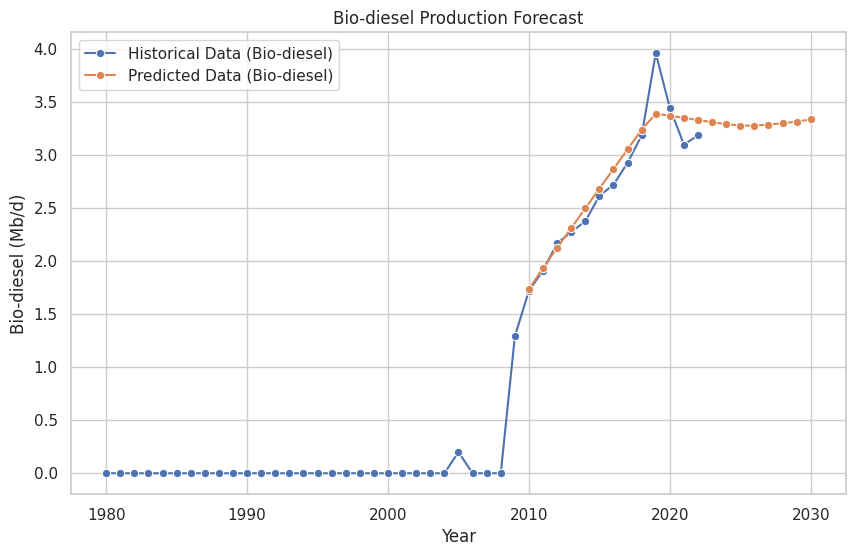

    Year  Bio-diesel (Mb/d)
0   2010           1.736889
1   2011           1.934820
2   2012           2.127691
3   2013           2.313150
4   2014           2.498609
5   2015           2.684068
6   2016           2.869528
7   2017           3.054986
8   2018           3.240446
9   2019           3.391087
10  2020           3.371093
11  2021           3.351099
12  2022           3.331105
13  2023           3.311111
14  2024           3.291117
15  2025           3.278937
16  2026           3.277468
17  2027           3.288743
18  2028           3.300018
19  2029           3.316840
20  2030           3.336391


In [35]:
# Prepare the data for training
X = df[['Year']].values
y = df['Bio-diesel (Mb/d)'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_scaled, y, epochs=2000, verbose=0)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(2010, 2031)})
X_future_scaled = scaler.transform(future_years)

# Predict future values
predictions = model.predict(X_future_scaled).flatten()

# Combine historical and predicted data for plotting
future_years['Bio-diesel (Mb/d)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for bio-diesel
sns.lineplot(x=df['Year'], y=df['Bio-diesel (Mb/d)'], marker='o', label='Historical Data (Bio-diesel)', ax=ax)

# Plot predicted data for bio-diesel
sns.lineplot(x=future_years['Year'], y=future_years['Bio-diesel (Mb/d)'], marker='o', label='Predicted Data (Bio-diesel)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Bio-diesel (Mb/d)')
plt.title('Bio-diesel Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for bio-diesel
print(future_years)


2/2 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


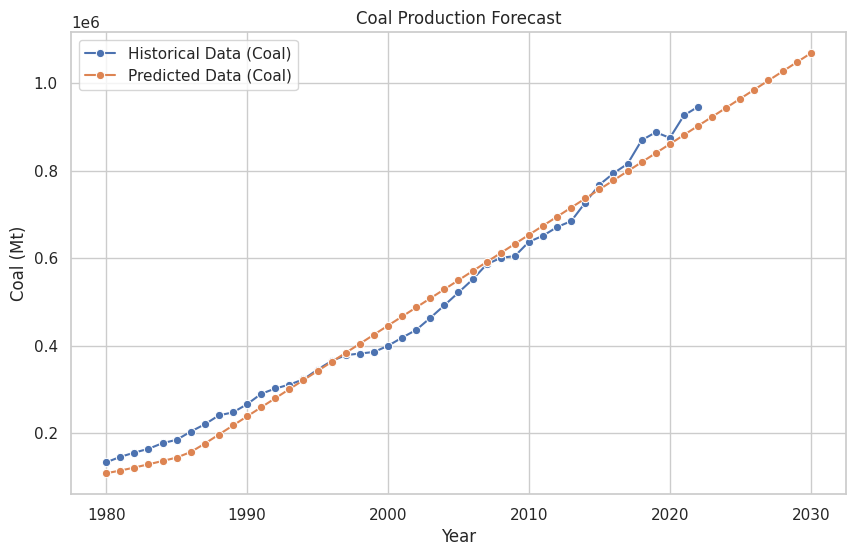

    Year     Coal (Mt)
0   1980  1.089579e+05
1   1981  1.151383e+05
2   1982  1.219573e+05
3   1983  1.294332e+05
4   1984  1.369090e+05
5   1985  1.447820e+05
6   1986  1.574720e+05
7   1987  1.766860e+05
8   1988  1.974087e+05
9   1989  2.181314e+05
10  1990  2.388540e+05
11  1991  2.595768e+05
12  1992  2.802995e+05
13  1993  3.010221e+05
14  1994  3.217448e+05
15  1995  3.424675e+05
16  1996  3.631902e+05
17  1997  3.839129e+05
18  1998  4.046356e+05
19  1999  4.253583e+05
20  2000  4.460810e+05
21  2001  4.668037e+05
22  2002  4.875263e+05
23  2003  5.082490e+05
24  2004  5.289717e+05
25  2005  5.496944e+05
26  2006  5.704171e+05
27  2007  5.911398e+05
28  2008  6.118624e+05
29  2009  6.325851e+05
30  2010  6.533079e+05
31  2011  6.740305e+05
32  2012  6.947532e+05
33  2013  7.154759e+05
34  2014  7.361986e+05
35  2015  7.569213e+05
36  2016  7.776439e+05
37  2017  7.983667e+05
38  2018  8.190894e+05
39  2019  8.398121e+05
40  2020  8.605348e+05
41  2021  8.812574e+05
42  2022  9

In [34]:
# Prepare the data for training
X = df[['Year']].values
y = df['Coal (Mt)'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_scaled, y, epochs=2000, verbose=0)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(1980, 2031)})
X_future_scaled = scaler.transform(future_years)

# Predict future values
predictions = model.predict(X_future_scaled).flatten()

# Combine historical and predicted data for plotting
future_years['Coal (Mt)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for coal
sns.lineplot(x=df['Year'], y=df['Coal (Mt)'], marker='o', label='Historical Data (Coal)', ax=ax)

# Plot predicted data for coal
sns.lineplot(x=future_years['Year'], y=future_years['Coal (Mt)'], marker='o', label='Predicted Data (Coal)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Coal (Mt)')
plt.title('Coal Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for coal
print(future_years)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


2/2 [==============================] - 0s 8ms/step


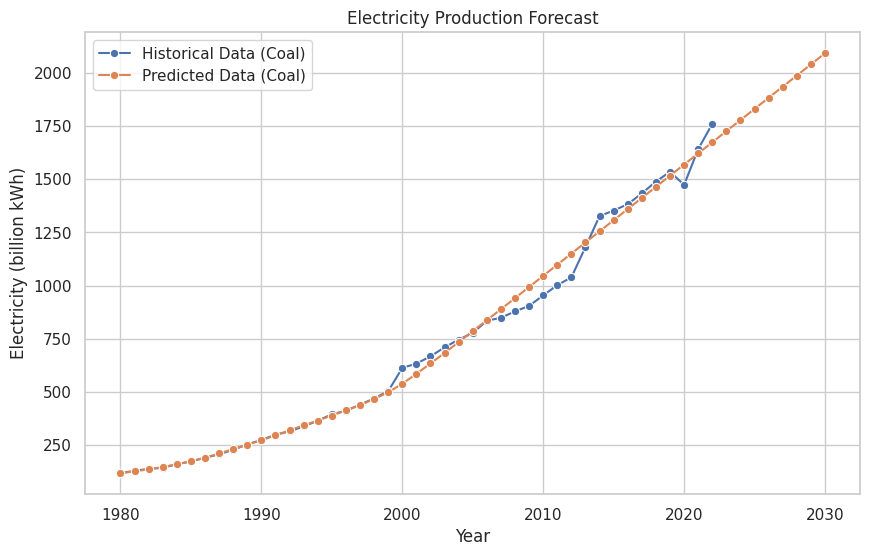

    Year  Electricity (billion kWh)
0   1980                 119.607239
1   1981                 128.038574
2   1982                 137.928207
3   1983                 148.459702
4   1984                 161.131058
5   1985                 175.884659
6   1986                 192.479050
7   1987                 212.138458
8   1988                 232.741257
9   1989                 253.344116
10  1990                 274.048645
11  1991                 297.219330
12  1992                 320.830200
13  1993                 344.556946
14  1994                 366.811340
15  1995                 390.332947
16  1996                 414.139526
17  1997                 439.506744
18  1998                 467.594971
19  1999                 499.642029
20  2000                 539.333130
21  2001                 586.291626
22  2002                 634.668091
23  2003                 683.981323
24  2004                 735.315613
25  2005                 786.650024
26  2006                 837

In [33]:
# Prepare the data for training
X = df[['Year']].values
y = df['Electricity (billion kWh)'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_scaled, y, epochs=2000, verbose=0)

# Create future years data for prediction (up to 2030)
future_years = pd.DataFrame({'Year': np.arange(1980, 2031)})
X_future_scaled = scaler.transform(future_years)

# Predict future values
predictions = model.predict(X_future_scaled).flatten()

# Combine historical and predicted data for plotting
future_years['Electricity (billion kWh)'] = predictions
df_combined = pd.concat([df, future_years])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot historical data for electricity
sns.lineplot(x=df['Year'], y=df['Electricity (billion kWh)'], marker='o', label='Historical Data (Coal)', ax=ax)

# Plot predicted data for electricity
sns.lineplot(x=future_years['Year'], y=future_years['Electricity (billion kWh)'], marker='o', label='Predicted Data (Coal)', ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Electricity (billion kWh)')
plt.title('Electricity Production Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for electricity
print(future_years)


# Predicting and analyzing India's fuel and energy production.